<a href="https://colab.research.google.com/github/MaritzaL34/tarea/blob/main/Copia_de_Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-16-6f1bf20e9cd4>:115: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ep = Ellipse((self.x,self.y),3*self.nectar,3*self.nectar,0,color=self.color,alpha=round((0.1*self.nectar),2))
<ipython-input-16-6f1bf20e9cd4>:117: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ep = Ellipse((self.x,self.y),0.3,0.3,0,color=self.color,alpha=round((1.0*self.nectar),2))
<ipython-input-16-6f1bf20e9cd4>:119: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ep = Ellipse((self.x,self.y),0.2,0.8,0,color=self.color,alpha=round((0.2*self.nectar),2))
<ipython-input-16-6f1bf20e9cd4>:121

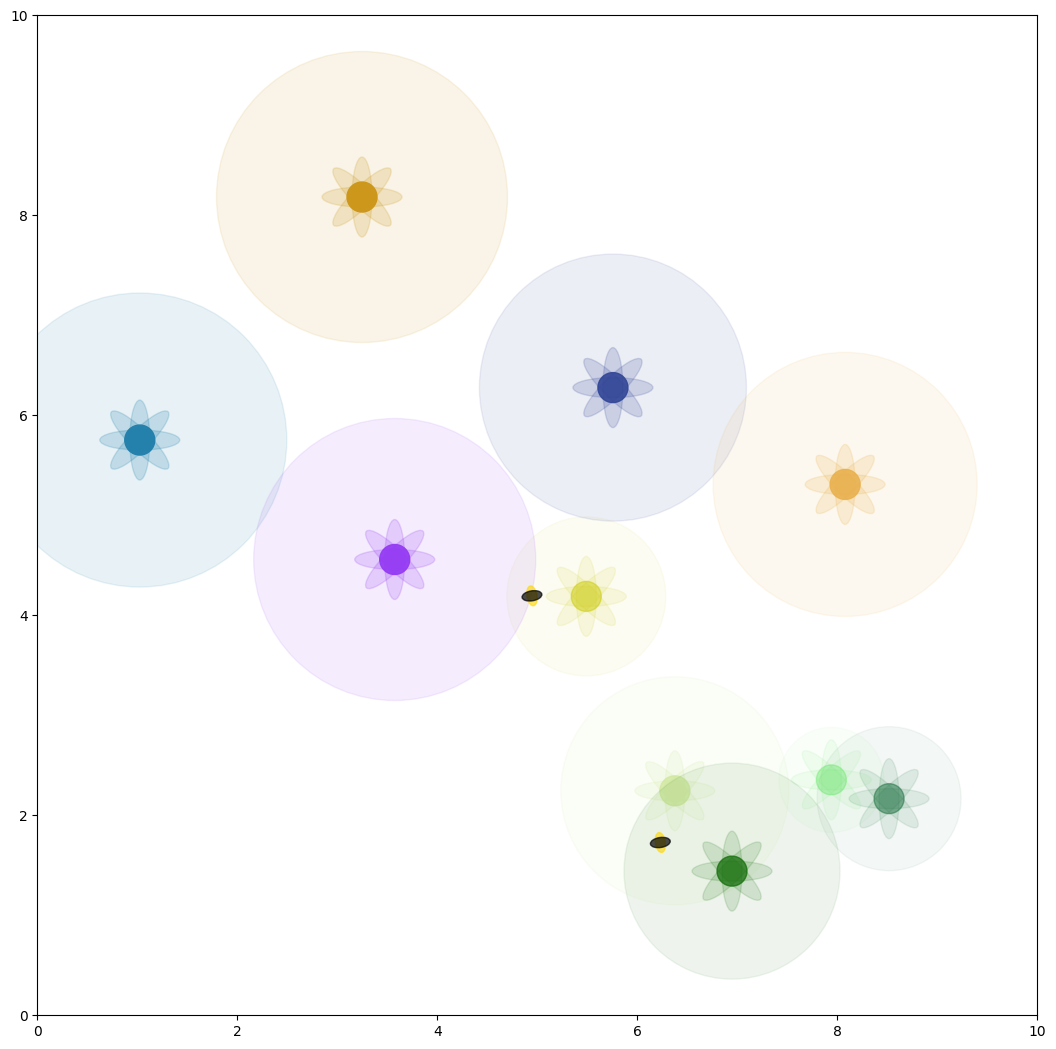

In [ ]:
"""
==================
Animación template
Principios de programación y análisis de datos.
==================
Animación de una competencia entre autos gobernados por motores aleatorios.
Maritza L. Vences Guzmán
Fecha: 8 Diciembre 2023.
"""
# Declaración de librerias

import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.patches import Ellipse, Wedge

# parametros relacionados con la animación
plt.rcParams['animation.embed_limit'] = 2**128



"""
Parámetros GLOBALES del sistema
"""
n_abejas            = 2     # Número de abejas
n_flores            = 10
numero_frame_actual = 0
L = 10


# Se genera el "lienzo" o espacio para el escenario.
fig = plt.figure(figsize=(L, L))
ax  = fig.add_axes([0, 0, 1, 1], frameon=True)
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

"""
Definición de la clase abeja.
"""
class Abeja:
    def __init__(self):
        # Variables propias (self) de la abeja.
        self.vel                =   0.05                     # Velocidad de desplazamiento de la abeja.
        self.x                  =   random.uniform(0,L)     # Coordenada X, valor inicializado random entre 0 y L
        self.y                  =   random.uniform(0,L)     # Coordenada Y, valor inicializado random entre 0 y L
        self.percoreo           =   0                       # Cantidad de alimento en la abeja
        self.angulo             =   random.uniform(0,360)
        self.consumo_nectar     =   0.05
        self.consumo_max        =   0.5

    def dibuja_abeja(self):
        # Parametros cuerpo abeja
        ancho_abeja         =   0.2
        alto_abeja          =   0.1
        color_cuerpo_abeja  =   "black"
        # Parametros asociados al ala de la abeja
        ancho_ala           = 0.35*ancho_abeja
        alto_ala            = 3.0*alto_abeja
        angulo_ala          = self.angulo+90
        color_alas_abeja    = "gold"
        # Primero dibujo las alas de la abeja
        ep = Ellipse((self.x,self.y),ancho_abeja,alto_abeja,angulo_ala,color=color_alas_abeja,alpha=0.6)
        ax.add_patch(ep)
        # Enseguida dibujo el cuerpo de la abeja.
        ep = Ellipse((self.x,self.y),ancho_abeja,alto_abeja,self.angulo,color=color_cuerpo_abeja,alpha=0.7)
        ax.add_patch(ep)

    def actualiza_posicion(self):
        # Inicia cálculo de la atracción ponderada de cada una de las flores en lista_flor
        acx = acy = 0
        for flor in lista_flores:
            d       = math.dist([self.x,self.y],[flor.x,flor.y])
            sigma   = flor.nectar
            w = math.pow(sigma*math.sqrt(2*math.pi),-1) * math.exp(-math.pow(d,2)/(2*math.pow(sigma,2)))
            acx += self.vel*math.cos(self.angulo) + w * ( flor.x-self.x )
            acy += self.vel*math.sin(self.angulo) + w * ( flor.y-self.y )

        # Termina
        self.x = (self.x % L) + acx
        self.y = (self.y % L) + acy
        self.angulo = math.atan2(self.y,self.x) + random.uniform(-10,10)


    def aleja_abeja(self):
        # Inicia cálculo de la atracción ponderada de cada una de las flores en lista_flor
        acx = acy = 0
        for flor in lista_flores:
            d  = math.dist([self.x,self.y],[flor.x,flor.y])
            sigma   = flor.abejas_percoreo
            w = math.pow(sigma*math.sqrt(2*math.pi),-1) * math.exp(-math.pow(d,2)/(2*math.pow(sigma,2)))
            acx += self.vel*math.cos(self.angulo) + w * ( flor.x-self.x )
            acy += self.vel*math.sin(self.angulo) + w * ( flor.y-self.y )
        # Termina



class Flor:
    def __init__(self,frame_actual):
        self.x                  =   random.uniform(1,L-1)
        self.y                  =   random.uniform(1,L-1)
        self.nectar             =   round(random.uniform(0.75,1),2)
        self.color              =   [random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)]
        self.radio_percoreo     =   0.9
        self.abejas_percoreo    =   0
        self.frame_origen       =   frame_actual
        self.caducidad          =   30
        self.active             =   True

    def dibuja_flor(self):
        ep = Ellipse((self.x,self.y),3*self.nectar,3*self.nectar,0,color=self.color,alpha=round((0.1*self.nectar),2))
        ax.add_patch(ep)
        ep = Ellipse((self.x,self.y),0.3,0.3,0,color=self.color,alpha=round((1.0*self.nectar),2))
        ax.add_patch(ep)
        ep = Ellipse((self.x,self.y),0.2,0.8,0,color=self.color,alpha=round((0.2*self.nectar),2))
        ax.add_patch(ep)
        ep = Ellipse((self.x,self.y),0.2,0.8,45,color=self.color,alpha=round((0.2*self.nectar),2))
        ax.add_patch(ep)
        ep = Ellipse((self.x,self.y),0.2,0.8,90,color=self.color,alpha=round((0.2*self.nectar),2))
        ax.add_patch(ep)
        ep = Ellipse((self.x,self.y),0.2,0.8,135,color=self.color,alpha=round((0.2*self.nectar),2))
        ax.add_patch(ep)

#Parte 1 Consumo de nectar por flor

    def consumo_nectar(self):
        for abeja in lista_abejas:
            d  = math.dist([self.x,self.y],[abeja.x,abeja.y])
            if(d<self.radio_percoreo):
                self.nectar = self.nectar - abeja.consumo_nectar
                if(self.nectar<0):
                    self.active = False

#Parte 1-3 desaparecer flores caducadas
    def revisa_caducidad(self,frame_actual):
        dif_frames = frame_actual - self.frame_origen
        if(dif_frames > self.caducidad):
#            print(f"Caduco flor: {dif_frames}")
            self.active = False

    def check_eliminar_flor(self,frame_actual):
        lista_flores.remove(self)
        lista_flores.append(Flor(frame_actual))
#        print("Nueva flor")

#Parte 4 abejas empiecen desde nivel 0 de nectar y se reproducen
    def Nuevo_nectar(self,lista_flores):
      self.consumo_nectar = 0
      for f in lista_flores:
        d  = math.dist([self.x,self.y],[f.x,f.y])
        if (d<self.radio_percoreo):
          self.consumo_nectar = self.consumo_nectar + 0.05
          if self.consumo_nectar > self.consumo_max:
            lista_abejas.append (Abeja(L))
            print(f"Abejax:{self.x}, y:{self.y}, nectar:{self.consumo_nectar}")
            self.consumo_nectar = 0


#Parte 5 Percorear
    def ponderacion_percoreo(self):
     self.consum_alto =  0.35
     for abeja in lista_abejas:
      if (self.consumo_nectar>self.consum_alto):
        self.aleja_abeja


"""
+ Se genera una lista que contiene los elementos o partículas que se desplazarán en el espacio recien construido.
"""
lista_abejas = []
for _ in range(n_abejas):
    lista_abejas.append(Abeja())

lista_flores = []
for _ in range(n_flores):
    lista_flores.append(Flor(0))

"""
Función de actualización, el parámetro "frame_number" se calcula a partir de los parámetros en FuncAnimation.
"""
def update(frame_number):
    ax.cla()
    ax.set(xlim=(0,L),ylim=(0,L))



    # Ciclo para dibujar las flores
    for f in lista_flores:
        if(f.active):
            f.dibuja_flor()

    # Ciclo para dibujar las abejas
    for a in lista_abejas:
        a.dibuja_abeja()

    # Actualiza posiciones de TODOS las abejas.
    for a in lista_abejas:
        a.actualiza_posicion()

    for f in lista_flores:
        if(f.active):
            f.consumo_nectar()
            f.revisa_caducidad(frame_number)

    for f in lista_flores:
        if not f.active:
            f.check_eliminar_flor(frame_number)


"""
En la linea 118 se realiza la ejecución de la animación. El frame rate y número de pasos se definen por medio de los siguientes parámetros:
n_frames -> numero de frames.
t_interval -> tiempo entre cuadros consecutivos (en milisegundos).
https://matplotlib.org/stable/api/animation_api.html
"""
n_frames = 200;
t_interval = 150;
animation = FuncAnimation(fig, update,frames=n_frames,interval=t_interval)

# Como estamos coriendo el código en una máquina virtual de colab,
# esta linea se incluye para poder vaciar el output desde la salida estandar (monitor) hacia un formato de video compatible con el motor del navegador (HTML)

HTML(animation.to_html5_video())